# Import

In [143]:
import pandas as pd
import numpy as np
# ********************************************************
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
# ********************************************************
import seaborn as sns
# ********************************************************
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
# ********************************************************
import warnings
# ********************************************************
from sklearn import datasets, metrics, preprocessing, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# ********************************************************
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import t, shapiro


# Permet de retirer les warning message du a l'import des fichier excel.xlsx
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# Permet de cacher les avertissement. il faut quand meme vérifier que les donnée sont bien mis
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
pd.options.mode.chained_assignment = None  # default='warn'

# permet d'afficher toute les colonne d'un head
# pd.set_option('max_columns', None)
# pd.options.display.max_rows = 999

# permet d'afficher toute les ligne d'un head
# pd.set_option('max_rows', None)

# Reset de l'affichage des colonnes et ligne
# pd.reset_option('max_columns')
pd.reset_option('max_rows')

# Read CSV


## Billets

length : la longueur du billet (en mm) ;
height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
diagonal : la diagonale du billet (en mm).

In [144]:
df_billets = pd.read_csv("data/billets.csv", sep=';')
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [145]:
# rien qui ressort ici
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [146]:
# margin low - régréssion linéaire pour combler
df_billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [147]:
# 2 variable une pour les vrais et l'autre pour les faux billets
df_billets['is_genuine'].unique()

array([ True, False])

In [148]:
print('Vrai :',df_billets[df_billets['is_genuine'] == True]['margin_low'].isna().sum(),'valeur manquante')
print('Faux :',df_billets[df_billets['is_genuine'] == False]['margin_low'].isna().sum(),'valeur manquante')
print('Total :',df_billets['margin_low'].isna().sum(),'valeur manquante')

Vrai : 29 valeur manquante
Faux : 8 valeur manquante
Total : 37 valeur manquante


# Analyse

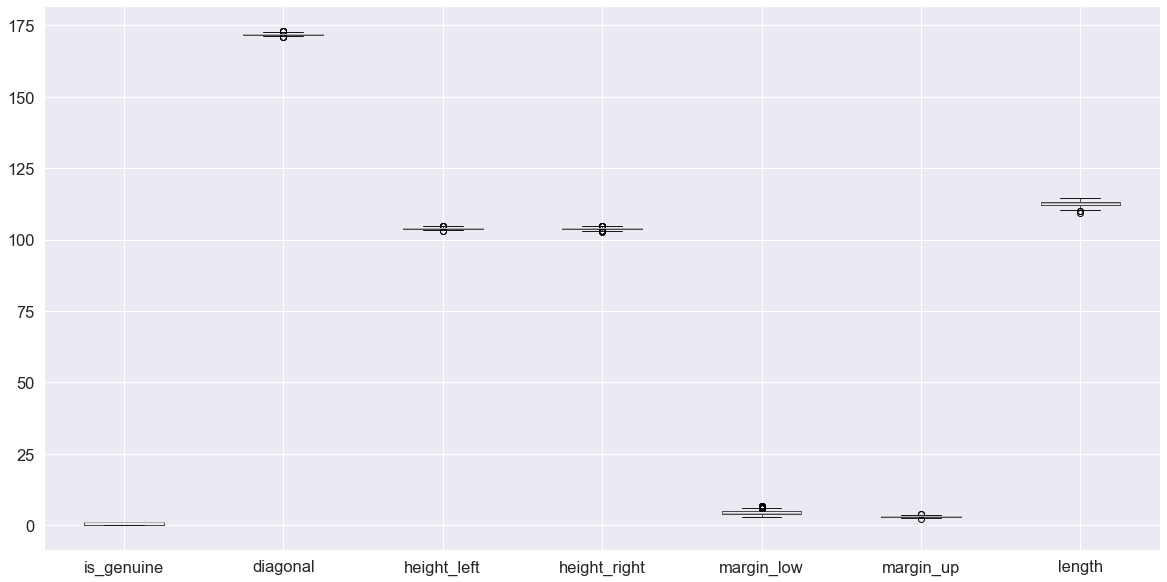

In [149]:
boxplot = df_billets.boxplot(figsize=(20,10))

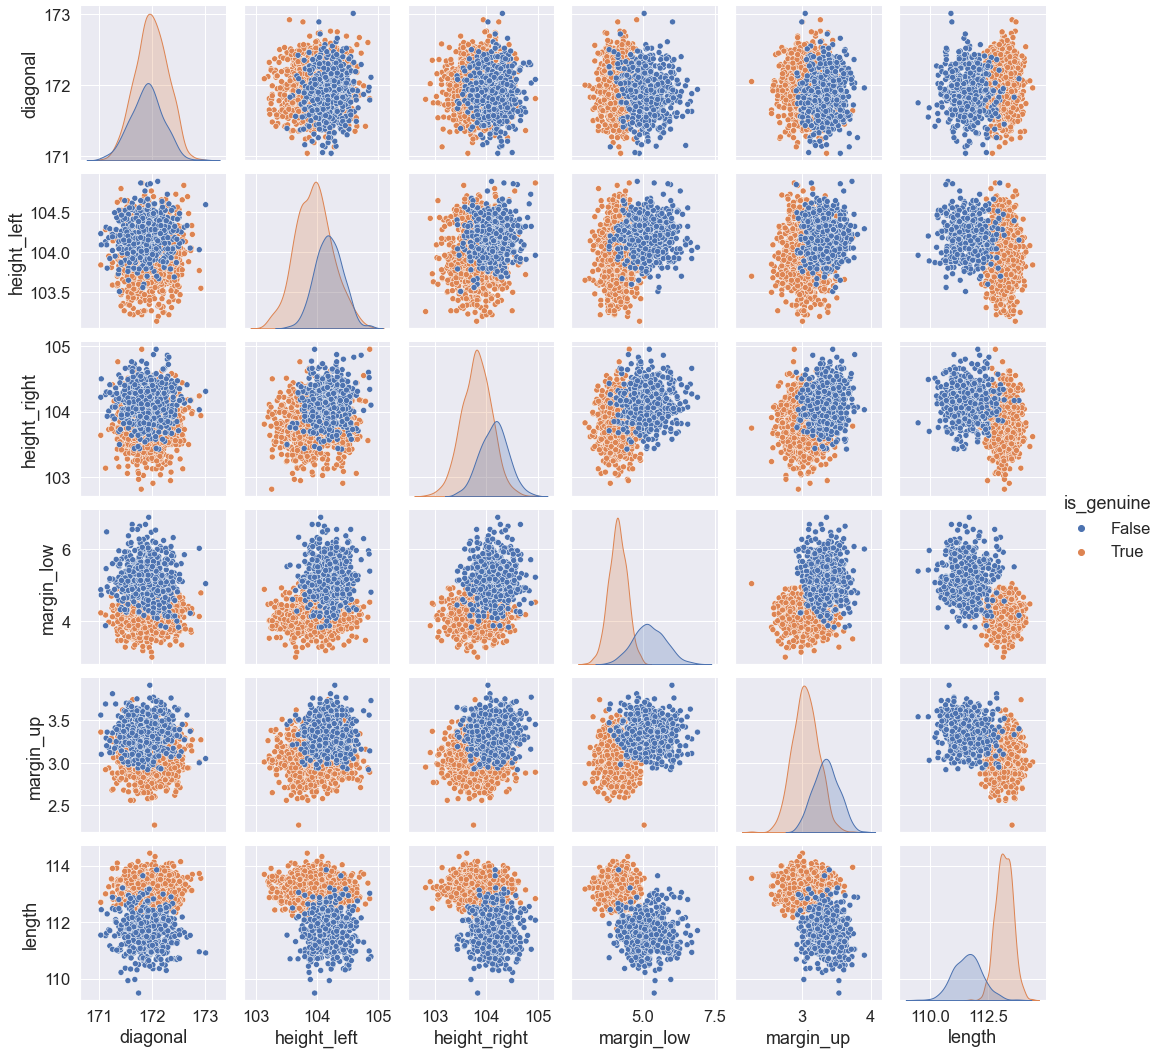

In [150]:
# la répartition des dimensions des billets
sns.pairplot(df_billets, hue="is_genuine")
# plt.savefig('png/representation_des_variable.png', dpi=300, transparent=True,bbox_inches='tight')

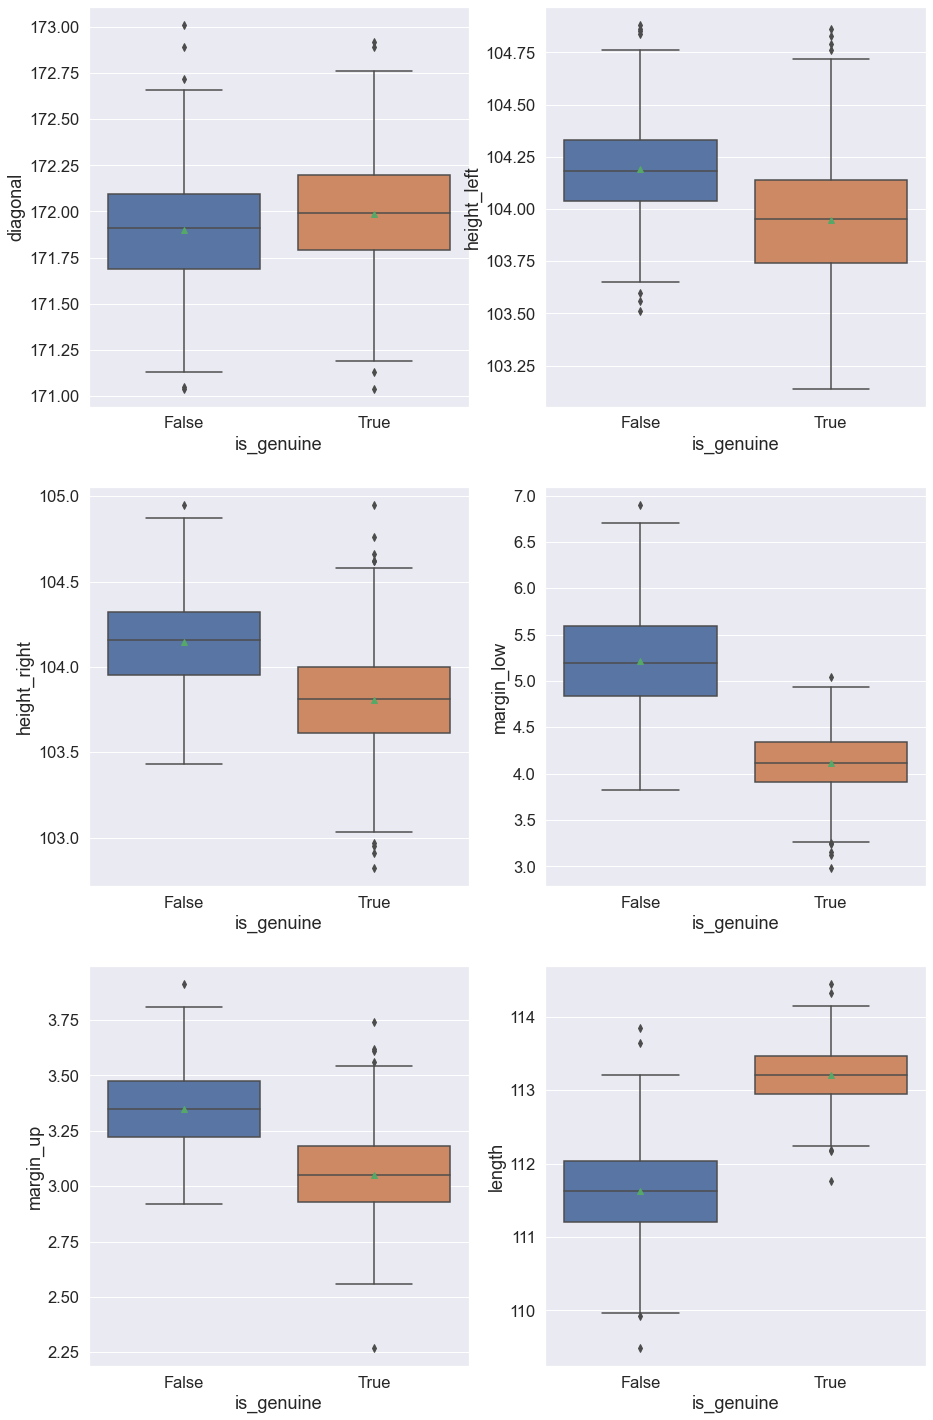

In [151]:
plt.figure(figsize=(15,25))
plt.subplot(321)
sns.boxplot(data=df_billets, x='is_genuine', y='diagonal', showmeans=True).figsize=(20,10)
plt.subplot(322)
sns.boxplot(data=df_billets, x='is_genuine', y='height_left', showmeans=True).figsize=(20,10)
plt.subplot(323)
sns.boxplot(data=df_billets, x='is_genuine', y='height_right', showmeans=True).figsize=(20,10)
plt.subplot(324)
sns.boxplot(data=df_billets, x='is_genuine', y='margin_low', showmeans=True).figsize=(20,10)
plt.subplot(325)
sns.boxplot(data=df_billets, x='is_genuine', y='margin_up', showmeans=True).figsize=(20,10)
plt.subplot(326)
sns.boxplot(data=df_billets, x='is_genuine', y='length', showmeans=True).figsize=(20,10)

plt.savefig('png/analyse_billets.png', dpi=300, transparent=True,bbox_inches='tight')

plt.show()

Ont voit une différence entre les vrai et faux billets
les faux billets ont plus de marge en haut et en bas
ils ont aussi une plus grande hauteur a droite et a gauche
la diagonal et la longueur sont elle moins grande que les vrai billets

## Valeur manquante

In [152]:
# je check mes valeur manquantes dans ma colonne margin low
print('Nombre de valeurs manquantes :',df_billets['margin_low'].isna().sum())
df_billets[df_billets['margin_low'].isna()]

Nombre de valeurs manquantes : 37


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


## Check doublons

In [153]:
df_billets.duplicated().sum()

0

# split df NaN

Ici je vais séparer ma dataframe : la premiere avec seulement les NaN et la seconde sans aucun NaN

In [154]:
# création dataframe null only
df_billets_NaN = df_billets[df_billets.isna().any(axis=1)]
print('Nombre de ligne/colonne  :',df_billets_NaN.shape)
print('Nombre de null :',df_billets_NaN['margin_low'].isna().sum())

df_billets_NaN.head()

Nombre de ligne/colonne  : (37, 7)
Nombre de null : 37


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [155]:
# création dataframe sans null
df_billets_clear = df_billets.dropna()
print('Nombre de ligne/colonne :',df_billets_clear.shape)
print('Nombre de null :',df_billets_clear['margin_low'].isna().sum())

df_billets_clear.head()

Nombre de ligne/colonne : (1463, 7)
Nombre de null : 0


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Régréssion linéaire

In [156]:
#créer un objet reg lin
Reg = LinearRegression()

#créer y et x , X ou je drop ma colonne et Y ou je ne garde que ma colonne
X = df_billets_clear.drop('margin_low', axis=1)
y = df_billets_clear['margin_low']

Reg.fit(X,y)

LinearRegression()

<a href="https://www.stat4decision.com/fr/faire-regression-lineaire-r-python/#:~:text=Le%20principe%20de%20la%20r%C3%A9gression,d%C3%A9pendante%20par%20les%20variables%20ind%C3%A9pendantes">Liens régrésion lineaire</a>

<a href="https://blog.nalo.fr/lexique/regression-lineaire/">b est l’intercept, c’est-à-dire la valeur de Y lorsque X est égal à zéro</a>

In [157]:
print(Reg.intercept_)
print(Reg.coef_)

#calcul du R²
print('Score R² :',Reg.score(X,y))

2.866822892054086
[-1.14059676 -0.0130159   0.02829069  0.02674982 -0.21284432 -0.00388299]
Score R² : 0.6168760755671029


In [158]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)

(1170, 6)
(293, 6)


In [159]:
# entrainement du modèle
Reg.fit(x_train,y_train)

# faire des prévision en utilisant le modèle
y_pred = Reg.predict(x_test)
y_pred[: 10]

array([4.10500942, 5.30962594, 5.28987405, 4.11269369, 4.05417517,
       4.16504079, 5.22729513, 5.18335646, 4.10678203, 5.29598774])

In [160]:
# calculer la perfomance du modeles
print(np.mean((y_test-y_pred)**2))

0.1802902349820695


In [161]:
print(np.sqrt(np.mean((y_test-y_pred)**2)/X.shape[0]))

0.011101046947173756


<a href="https://blog.minitab.com/fr/comment-interpreter-les-resultats-de-lanalyse-de-regression-valeurs-p-et-coefficients">Comment savoir si une variable est significative ou non dans la régréssion linéaire</a>

In [162]:
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length', data=df_billets_clear).fit()
# valeur p importante = non significative
# Une faible valeur p (<0,05) susceptible d’être un ajout significatif à votre modèle
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          4.75e-299
Time:                        16:39:14   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

## Supprimer les variable non significative

Ici je vais prendre les p-value les plus élevé et les retirer car ce sont les variable les moins significatives.

In [163]:
# length étant la variable la moins significative je la retire
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up', data=df_billets_clear).fit()

print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          2.12e-300
Time:                        16:39:14   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

In [164]:
# diagonal étant la variable la moins significative je la retire
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up', data=df_billets_clear).fit()

print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          8.76e-302
Time:                        16:39:14   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

In [165]:
# height_right étant la variable la moins significative je la retire
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + margin_up', data=df_billets_clear).fit()

print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          3.63e-303
Time:                        16:39:14   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

In [166]:
# height_left étant la variable la moins significative je la retire
reg_multi = smf.ols('margin_low ~ is_genuine + margin_up', data=df_billets_clear).fit()

print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 02 Dec 2022   Prob (F-statistic):          1.24e-304
Time:                        16:39:14   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Ici nos variable sont donc maintenant toute significative.

Donc les plus optimiser pour le bon fonctionnement de notre modele

## Calculez les leviers

On peut calculer les leviers comme ceci, en sachant que le seuil des leviers est de $2∗\frac{p}{n}$.

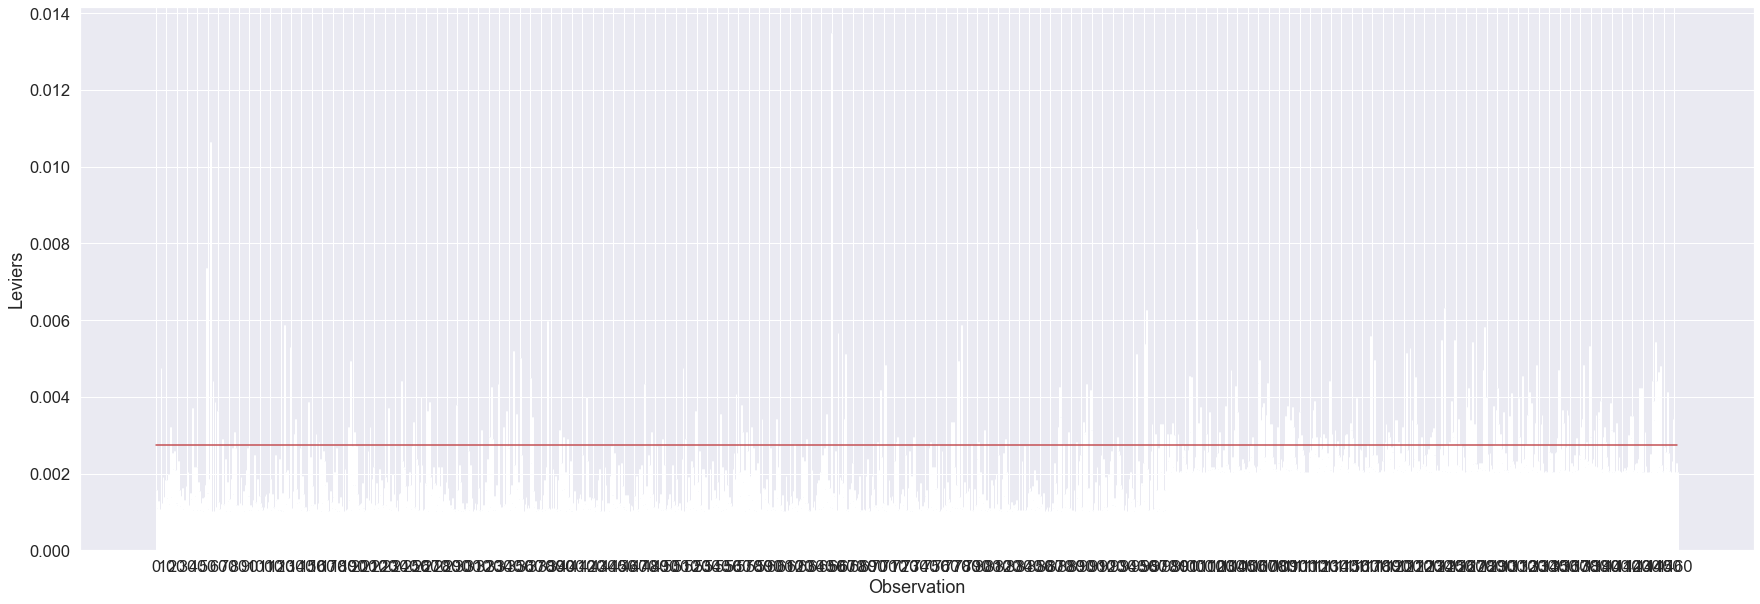

In [167]:
#Calcul de levier
alpha = 0.05             #fixer alpha récupérer 𝑛 et 𝑝
n = df_billets_clear.shape[0]
p = 2
analyses1 = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

analyses['levier'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = 2*p/n
plt.figure(figsize=(30,10))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1463, step=10))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_levier, seuil_levier], color='r')
plt.show()

In [168]:
#Sélection des points pour lesquels le levier est supérieur au seuil
analyses.loc[analyses['levier'] > seuil_levier, :]

,obs,levier
4,5,0.004748
13,14,0.003212
34,35,0.003704
48,49,0.007353
52,53,0.010647
...,...,...
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796
1453,1454,0.004136


## Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

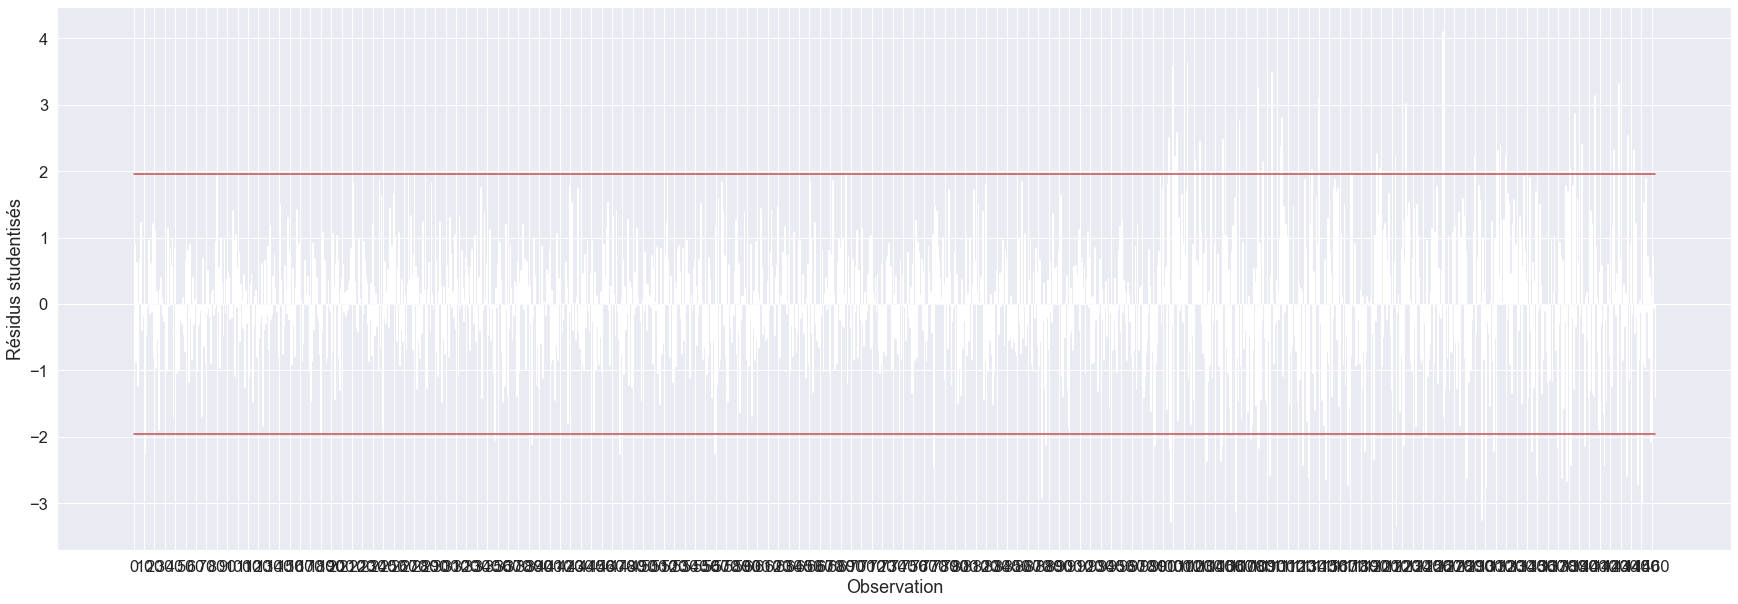

In [169]:
#Calculer les résidus studentisés
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
plt.figure(figsize=(30,10))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1463, step=10))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1463], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1463], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [170]:
#Sélection des points pour lesquels le résidu studentisé est supérieur au seuil_rstudent
analyses.loc[(analyses['rstudent'] > seuil_rstudent )| (analyses['rstudent'] < -seuil_rstudent) ]

,obs,levier,rstudent
10,11,0.001360,-2.260280
263,264,0.001906,1.965931
346,347,0.003559,-2.047795
382,383,0.001109,-2.114700
466,467,0.002227,-2.257411
...,...,...,...
1436,1437,0.002500,2.536322
1441,1442,0.005428,2.317452
1445,1446,0.002168,-2.709317
1449,1450,0.002053,-2.999746


## Déterminez la distance de Cook

Pour trouver la distance de Cook, nous exécutons ceci :

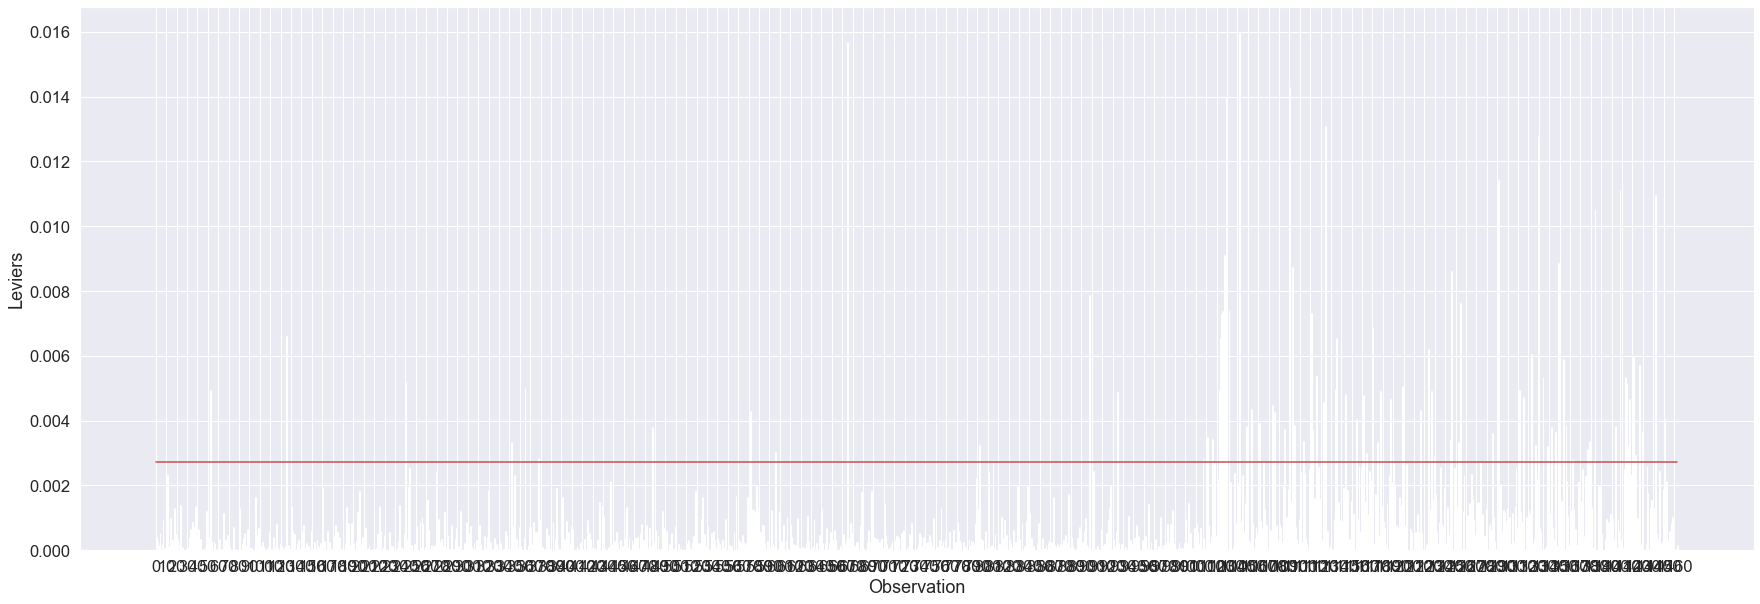

In [171]:
#Calcul de la distance de Cook
influence = reg_multi.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']
#Le seuil de la distance de Cook est de n-p.
seuil_dcook = 4/(n-p)
#détecter les observations influentes
plt.figure(figsize=(30,10))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1463, step=10))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1463], [seuil_dcook, seuil_dcook], color='r')
plt.show()

In [172]:
#Sélection des points pour lesquels La distance de Cook est supérieur au seuil de Cook
analyses.loc[analyses['dcooks'] > seuil_dcook, :]

,obs,levier,rstudent,dcooks
52,53,0.010647,-1.174185,0.004945
125,126,0.001204,0.667241,0.006626
239,240,0.001671,-0.215304,0.005198
341,342,0.001708,1.131974,0.003332
354,355,0.001204,-1.473461,0.004993
...,...,...,...,...
1426,1427,0.004228,-1.940064,0.005707
1429,1430,0.002053,0.675065,0.003686
1441,1442,0.005428,2.317452,0.010969
1450,1451,0.002703,-0.911463,0.004051


## Vérifier la colinéarité des variables

Une autre chose à vérifier est l'éventuelle colinéarité approchée des variables :

In [173]:
#vérifier l'éventuelle colinéarité approchée des variables
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007755, 1.5938854494007748]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

## Testez l’homoscédasticité

On peut également tester l’homoscédasticité (c'est-à-dire la constance de la variance) des résidus :

Test Homoscédasticité

H0 : Homoscédasticité
H1 : Heteroscédasticité

In [174]:
#Tester l’homoscédasticité avec Breusch Pagan
_, pval, __, f_pval = sms.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115836335e-36


In [175]:
#perform Bresuch-Pagan test
names = ['Bresuch-Pagan test', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(reg_multi.resid, variables)

lzip(names, test)

[('Bresuch-Pagan test', 163.45772873027045),
 ('p-value', 3.2033559115836335e-36),
 ('f-value', 91.82013129631463),
 ('f p-value', 2.745628359363973e-38)]

avec une p-value (3.20e-36) < 5% H0 est rejeté et donc on valide H1 hétériscédaticité

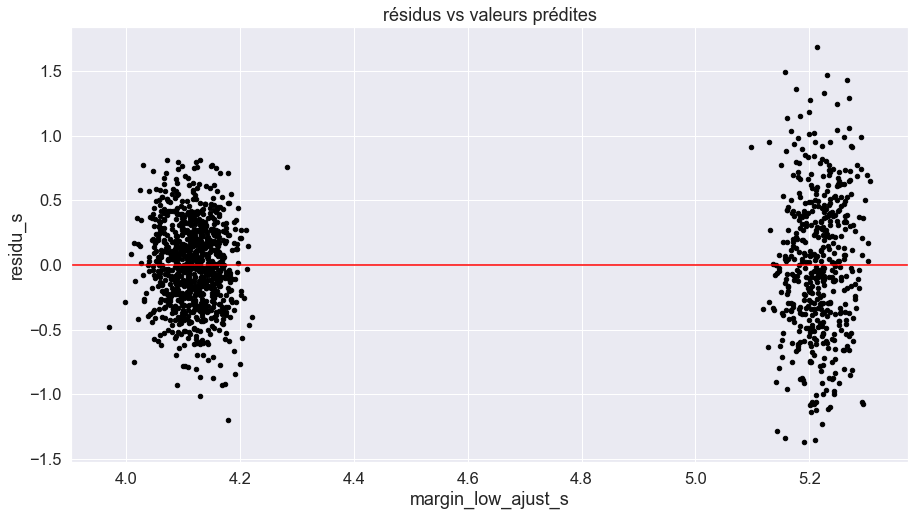

In [176]:
# Représentons le nuage de points avec les valeurs prédites comme abscisses et lesrésidus comme ordonnées.
df_billets_clear['margin_low_ajust_s'] = reg_multi.predict()
df_billets_clear['residu_s'] = reg_multi.resid
df_billets_clear.plot(kind='scatter', x='margin_low_ajust_s', y="residu_s", figsize=(15, 8), color='black')
plt.title('résidus vs valeurs prédites')
plt.axhline(y=0, color='red')
plt.show()

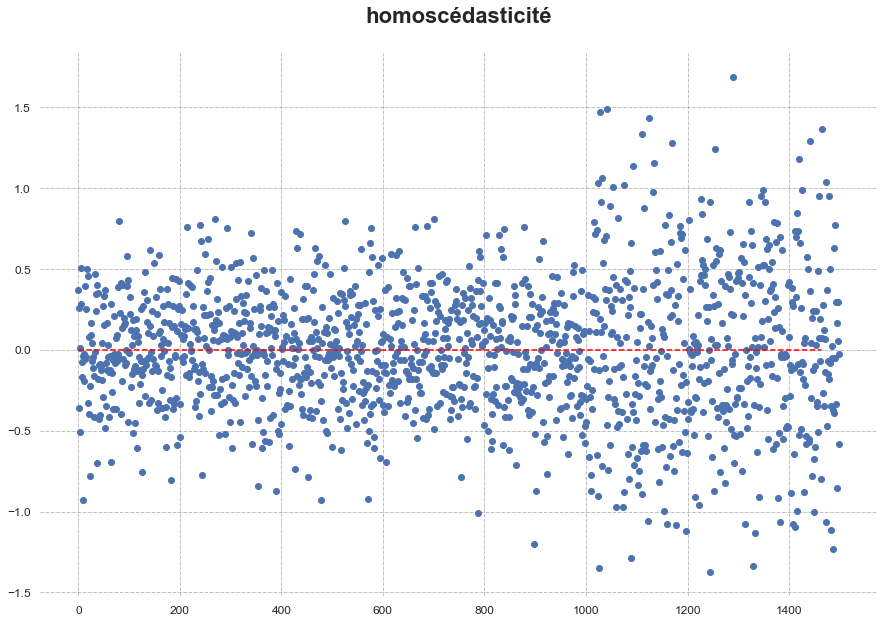

In [177]:
# nuage de points
fig, ax = plt.subplots(figsize = (15,10))
ax.set_title("homoscédasticité",
 fontsize=22, weight='bold', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.scatter(x=df_billets_clear.index, y = df_billets_clear["residu_s"], alpha=1)
plt.plot(np.repeat(0, len(df_billets_clear.index)+2), color="Red", linestyle='--')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('png/nuage_point_homoscédasticité.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

## Test Durbin Watson auto corrélation

Test d'autocorrélation entre les résidus :

H0 : il n'y a pas de corrélation
H1 : il y a une corréelation

In [178]:
#perform Durbin-Watson test
durbin_watson(reg_multi.resid)

#The test statistic is 2.041. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation not to be problematic in this regression model.

2.0410819121411503

0 = corrélation positive
4 = corrélation négative
entre 1,5 et 2,5 on peut rejeter l'autocorrélation


Avec un résultat de 2.04, je rejette donc h1

## Testez la normalité des résidus

Si l'on veut tester la normalité des résidus, on peut faire un test de Shapiro-Wilk.

Test Shapiro

H0 : Il y a normalité de la distribution des résidus
H1 : Il y a pas de normalité de la distribution des résidus

In [179]:
#Tester la normalité des résidus
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)

Avec un p-value (6.20e-06) < 5% H0 est rejeté et donc on valide H1 qu'il ny a pas de normalité distribution des résidus

### Représentez les résidus du modèle

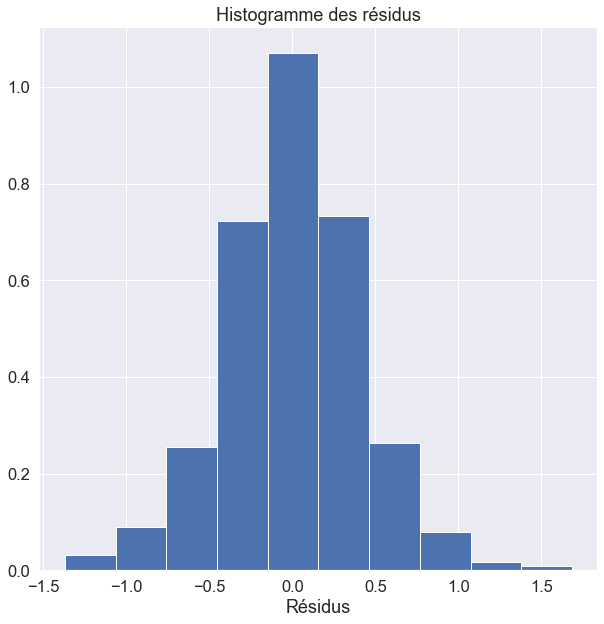

In [180]:
# Représentons l'histogramme des résidus du modèle
plt.hist(df_billets_clear['residu_s'], density=True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')
# plt.savefig('png/representation_residus.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

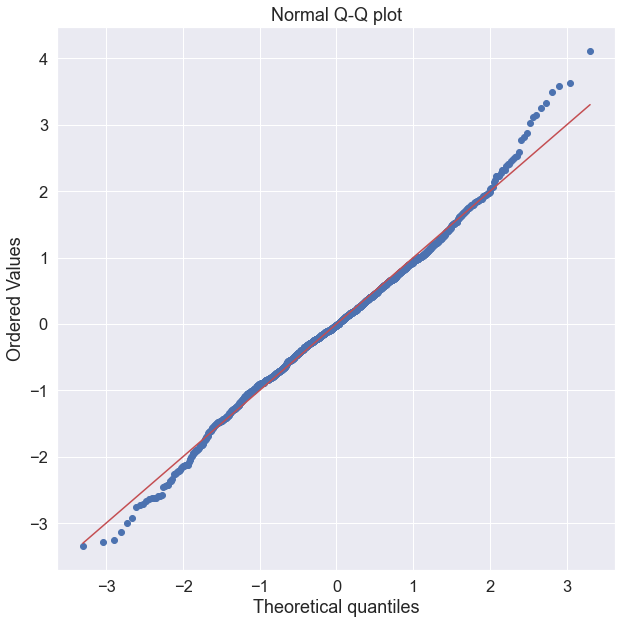

In [181]:
# Représentons le Diagramme Quantile Quantile
import scipy.stats as stats
z = (df_billets_clear['residu_s'] - df_billets_clear['residu_s'].mean())/df_billets_clear['residu_s'].std(ddof=1)
stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
# plt.savefig('png/qq_plot.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

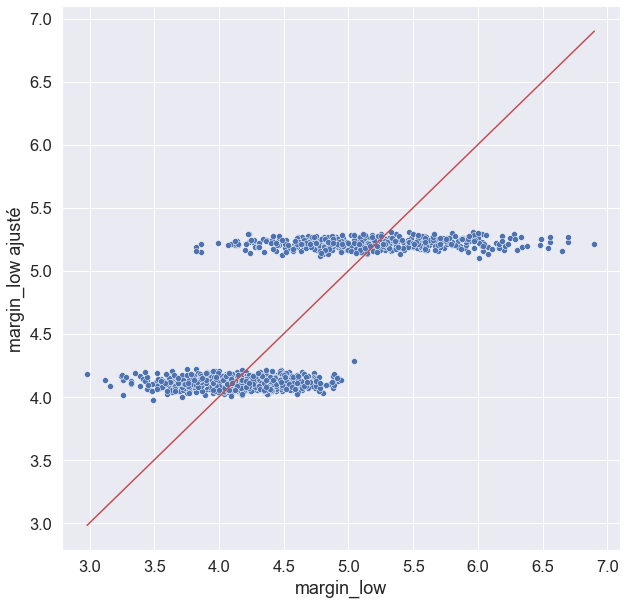

In [182]:
#Presentation de nuage de points, les margin_low ajuste en fonction du margin_low_ajust_s
df_billets_clear['margin_low_ajust_s'] = reg_multi.predict()
X_plot = [df_billets_clear['margin_low'].min(), df_billets_clear['margin_low'].max()]
ax = sns.scatterplot(x="margin_low", y="margin_low_ajust_s", data=df_billets_clear)
ax.set(xlabel='margin_low', ylabel='margin_low ajusté')
plt.plot(X_plot, X_plot, color='r')
plt.show()

In [183]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
print(durbin_watson(reg_multi.resid))

2.0410819121411503


In [184]:
print(Reg.intercept_)
print(Reg.coef_)

#calcul du R²
print('Score R² :',Reg.score(X,df_billets_clear['margin_low']))
# De ce que j'ai compris si la valeur de R² est en dessous de 90% cela veux dire quelle n'est pas de bonne qualité

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

0.5106155743652749
[-1.15622223  0.00357781  0.02732048  0.02568069 -0.2155796  -0.00625412]
Score R² : 0.6166754976589446
Mean squared error: 0.18


# prédiction et data final

In [185]:
# je drop ma colonne margin low sur mon data null
df_billets_NaN = df_billets_NaN.drop("margin_low",axis=1)

# prédictions sur df_billets_NaN
pred = Reg.predict(df_billets_NaN)

print('nombre de données :',len(pred))
print(pred)

nombre de données : 37
[4.05851802 4.1040469  4.12911507 3.976703   4.13289238 4.086611
 4.06595279 4.11643234 4.08465731 4.07320786 4.1191358  4.17022273
 4.12919047 4.04221537 4.1740413  4.21376981 4.11123465 4.09971538
 4.07737986 4.09256226 4.10300909 4.14345955 4.15321716 4.10490292
 4.1130686  4.19158133 4.10640012 4.08431249 4.1274503  5.2635991
 5.264947   5.28940732 5.31878342 5.21162469 5.18463342 5.19541651
 5.25711005]


In [186]:
# Je re-créer ma colonne avec mes données de prédictions
df_billets_NaN['margin_low'] = pred

print(df_billets_NaN.shape)
df_billets_NaN.head()

(37, 7)


,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.058518
99,True,171.93,104.07,104.18,3.14,113.08,4.104047
151,True,172.07,103.80,104.38,3.02,112.93,4.129115
197,True,171.45,103.66,103.80,3.62,113.27,3.976703
241,True,171.83,104.14,104.06,3.02,112.36,4.132892


In [187]:
# Ici je drop mon margin low ajust et résidu
df_billets_clear = df_billets_clear.drop(["margin_low_ajust_s",'residu_s'],axis=1)

# je crée une nouvelle a partir des deux dataframe dont celle que je viens de remplacer le margin_low par mes predictions
df_billets_final = pd.concat([df_billets_NaN, df_billets_clear] ,axis=0)

print(df_billets_final.isna().sum(), '\n')
print('Taille de la dataframe :',df_billets_final.shape, '\n')

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_up       0
length          0
margin_low      0
dtype: int64 

Taille de la dataframe : (1500, 7) 



In [188]:
df_billets_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 72 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
 6   margin_low    1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 83.5 KB


In [189]:
df_billets_final.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low
72,True,171.94,103.89,103.45,3.25,112.79,4.058518
99,True,171.93,104.07,104.18,3.14,113.08,4.104047
151,True,172.07,103.80,104.38,3.02,112.93,4.129115
197,True,171.45,103.66,103.80,3.62,113.27,3.976703
241,True,171.83,104.14,104.06,3.02,112.36,4.132892


# K-means

## Scaling

In [190]:
# drop mon is guenuine qui contien mes valeur vrai ou fausse
data = df_billets_final.drop('is_genuine',axis=1).copy()

# préparation des données pour le clustering
X = data.values

# Les variables sont ici centrée réduites
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means pour 2 cluster
km = KMeans(n_clusters=2)
km.fit(X_scaled)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

X_pca

array([[-0.92472302, -0.3055237 ],
       [-0.18847911,  0.10472889],
       [-0.40181419,  0.31756888],
       ...,
       [ 1.88856891, -0.60061363],
       [ 1.78963225,  0.51097748],
       [ 1.04296109, -1.47150085]])

In [191]:
# création de ma colonne cluster
df_billets_final['cluster'] = km.labels_

# je passe mes true false en int pour calculer le score du modele
df_billets_final['is_genuine'].replace([True,False],[1,0], inplace=True)

# création d'une variable pour mes centroïdes
km_centroid = pca.transform(km.cluster_centers_)

df_billets_final.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length,margin_low,cluster
72,1,171.94,103.89,103.45,3.25,112.79,4.058518,1
99,1,171.93,104.07,104.18,3.14,113.08,4.104047,1
151,1,172.07,103.80,104.38,3.02,112.93,4.129115,1
197,1,171.45,103.66,103.80,3.62,113.27,3.976703,1
241,1,171.83,104.14,104.06,3.02,112.36,4.132892,1


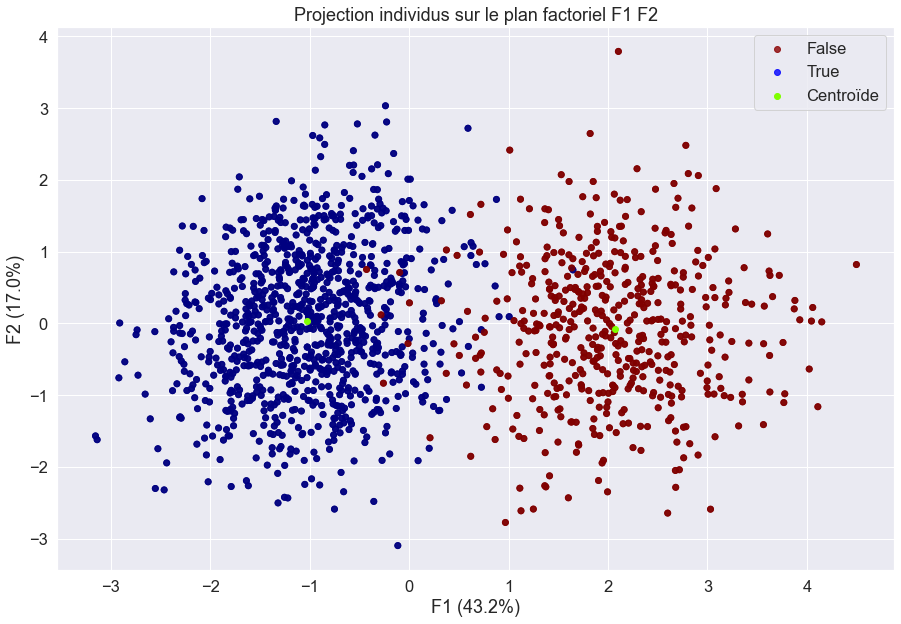

In [192]:
plt.figure(figsize=(15, 10))
colors = ['maroon', 'navy']

# je crée un tableau avec mes valeur true et false pour la légende
array_unique_tf = np.array(df_billets['is_genuine'])

# pour chacune de mes valeur unique dans mon tableau
for truefalse in np.unique(array_unique_tf):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_billets_final['is_genuine'].apply(lambda x: colors[x]),alpha=0.8,label=truefalse)

# je plot mes centroide
plt.scatter(km_centroid[:,0],km_centroid[:,1],color='chartreuse',label='Centroïde')

leg = plt.legend()
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('darkred')
leg.legendHandles[1].set_color('blue')

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title('Projection individus sur le plan factoriel F1 F2'.format(X_pca.shape[0]))

# plt.savefig('png/projection_individus.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

## Matrice de confusion

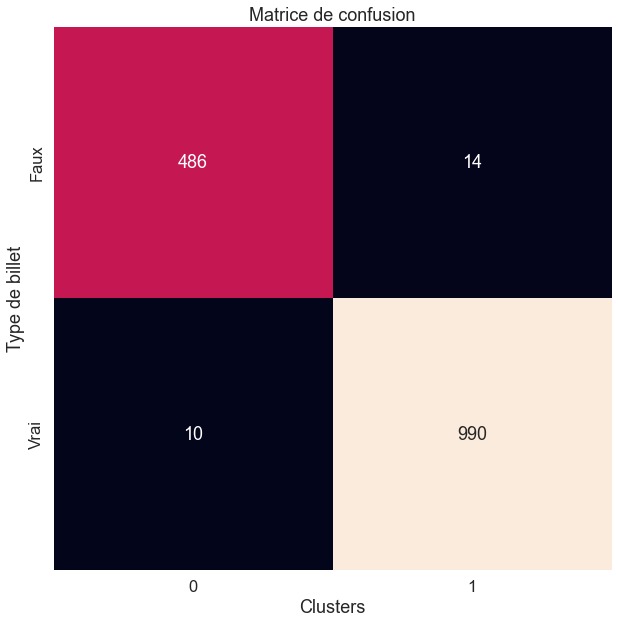

In [193]:
y_true = df_billets_final['is_genuine']
y_pred = km.labels_

# Representation graphique de notre matrice de confusion
sns.set(rc={'figure.figsize': (10, 10)}, font_scale=1.5)
sns.heatmap(pd.crosstab(y_true, y_pred), annot=True, yticklabels=["Faux","Vrai"] ,fmt='', cbar=False)

plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
# plt.savefig('png/matrice_de_confusion.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

## Classification report

In [194]:
# j'utilise la classification report pour mesuré la qualité du model
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       500
           1       0.99      0.99      0.99      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



<a href="https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308256-evaluez-un-algorithme-de-classification-qui-retourne-des-valeurs-binaires">evaluez performance modele</a>

La précision : la proportion de prédictions correctes parmi les points que l’on a prédits positifs.
Le recall : est le taux de vrais positifs, c’est à dire la proportion de positifs que l’on a correctement identifiés.
Pour évaluer un compromis entre rappel et précision, on peut calculer le <a href="https://kobia.fr/classification-metrics-f1-score/">F-score</a>, qui est leur moyenne harmonique.


# K-NN

<a href="https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-matriser-les-knn-avec-scikit-learn">knn</a>

In [195]:
X = df_billets_final.drop('is_genuine', axis=1)
y = df_billets_final['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

## Recherche de k value

<a href="https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb">Optimal k pour knn</a>

Minimum error:- 0.0033333333333333335 at K = 7


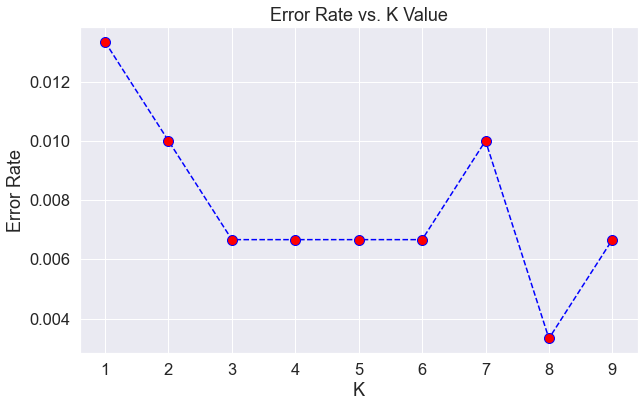

In [196]:
# recherche optimal de k
error_rate = []
for i in range(1,10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9966666666666667 at K = 7


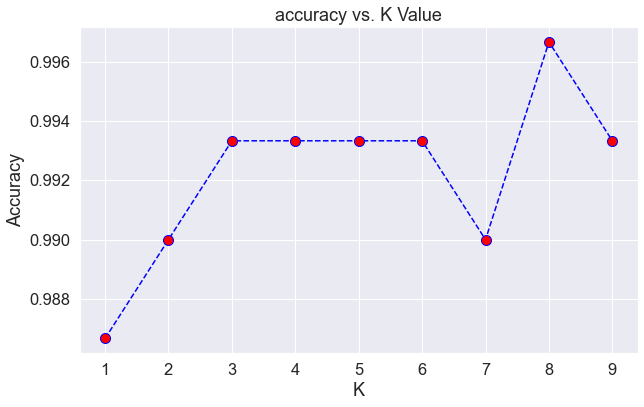

In [197]:
acc = []
# Will take some time
for i in range(1,10):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [198]:
# model avec k=3
knn = KNeighborsClassifier(n_neighbors=acc.index(max(acc)))

# fit le modele avec les training set
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

y_pred_train = knn.predict(X_train)

# score training et test
print('Training score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print('Model accuracy score with k=3 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
knn.score(X_test,y_test)

Training score: 0.9875
Test score: 0.9900
Model accuracy score with k=3 : 0.9900


0.99

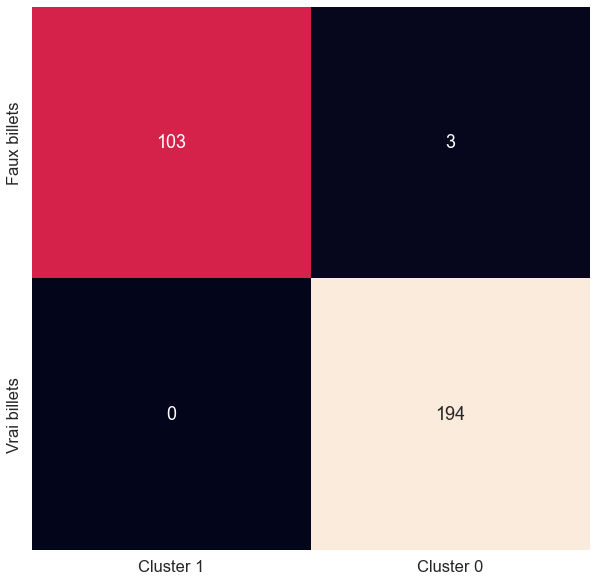

Vrais Positifs(TP) = 103
Vrais Négatifs(TN) = 194
Faux Positif(FP) = 3
Faux Négatifs(FN) = 0


In [199]:
cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(10,10))

cm_matrix = pd.DataFrame(data=cm, columns=['Cluster 1', 'Cluster 0'], index=[ 'Faux billets','Vrai billets',])
sns.heatmap(cm_matrix, annot=True, fmt='d',cbar=False)
plt.savefig('png/matrice_de_confusion_knn.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

print('Vrais Positifs(TP) =', cm[0,0])
print('Vrais Négatifs(TN) =', cm[1,1])
print('Faux Positif(FP) =', cm[0,1])
print('Faux Négatifs(FN) =', cm[1,0])

In [200]:
cm

array([[103,   3],
       [  0, 194]], dtype=int64)

In [201]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       106
           1       0.98      1.00      0.99       194

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



## ROC curve

<a href="https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308261-evaluez-un-algorithme-de-classification-qui-retourne-des-scores">ROC curve</a>

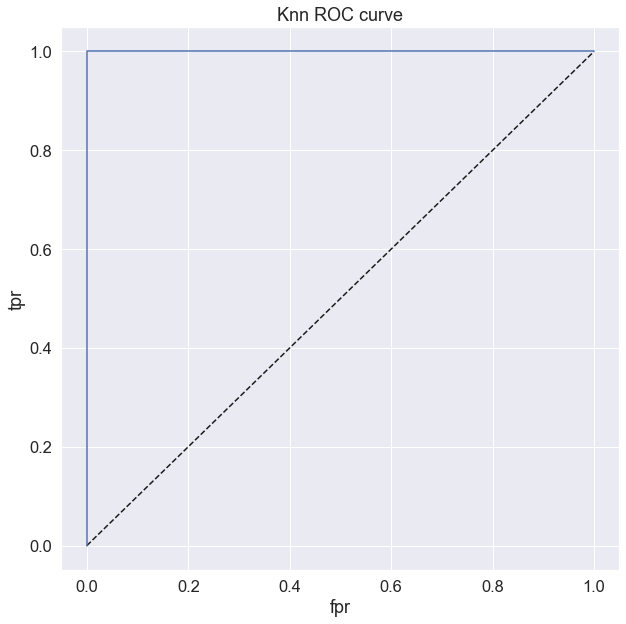

In [202]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve')
plt.savefig('png/knn_rc.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

In [203]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

1.0

# Régréssion logistique

In [204]:
X = df_billets_clear.drop('is_genuine', axis=1)
y = df_billets_clear['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Régression logistique
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

In [205]:
print('Train_score', model_lr.score(X_train,y_train))
print('Test_score', model_lr.score(X_test,y_test))

Train_score 0.9905982905982906
Test_score 0.9863481228668942


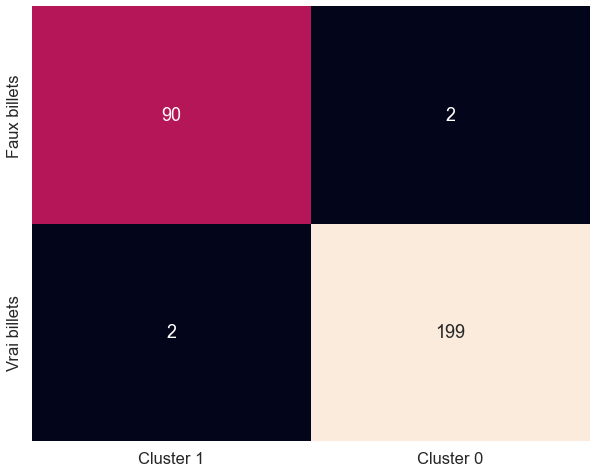

In [206]:
cm = confusion_matrix(y_test, y_pred)

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(10,8))

cm_matrix = pd.DataFrame(data=cm, columns=['Cluster 1', 'Cluster 0'], index=[ 'Faux billets','Vrai billets',])
sns.heatmap(cm_matrix, annot=True, fmt='d',cbar=False)
plt.savefig('png/matrice_de_confusion_lr.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

In [207]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98        92
        True       0.99      0.99      0.99       201

    accuracy                           0.99       293
   macro avg       0.98      0.98      0.98       293
weighted avg       0.99      0.99      0.99       293



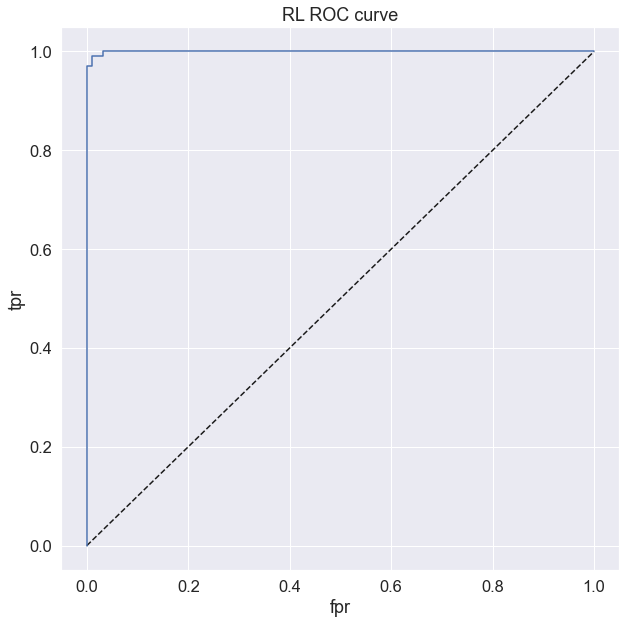

In [208]:
y_pred_proba = model_lr.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('RL ROC curve')
plt.savefig('png/rl_rc.png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()

In [209]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.999459225611075

# Fonction

In [211]:
# régréssion logistique
def test_model(csv):
    # csv = 'csv_file.csv
    data = pd.read_csv(csv)
    data_billets = data.drop('id', axis=1).copy()

    y_pred = model_lr.predict(data_billets)
    y_pred_proba = model_lr.predict_proba(data_billets)

    data['prédiction'] = y_pred
    data['probabilité'] = y_pred_proba[:, 1]
    data['probabilité'] = (round(data['probabilité'],2)*100).astype(str) + '%'

    data['résult'] = data['prédiction'].replace({False:'faux',True:'vrai'})
    data.set_index('id',inplace=True)
    data.drop(['diagonal','height_left','height_right','margin_low','margin_up','length'], axis=1, inplace=True)

    return data


test_model("data/billets_test.csv")

,prédiction,probabilité,résult
id,,,
B_1,True,99.0%,vrai
B_2,False,1.0%,faux
B_3,True,100.0%,vrai
B_4,False,0.0%,faux
B_5,False,1.0%,faux


In [212]:
data = pd.read_csv('data/billets_test.csv')

data.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [213]:
test_model("data/billets_test.csv")

,prédiction,probabilité,résult
id,,,
B_1,True,99.0%,vrai
B_2,False,1.0%,faux
B_3,True,100.0%,vrai
B_4,False,0.0%,faux
B_5,False,1.0%,faux
